# *Previo Fase 1*

        date       ISE     ISE.1        SP       DAX      FTSE    NIKKEI  \
0 2009-01-05  0.035754  0.038376 -0.004679  0.002193  0.003894  0.000000   
1 2009-01-06  0.025426  0.031813  0.007787  0.008455  0.012866  0.004162   
2 2009-01-07 -0.028862 -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3 2009-01-08 -0.062208 -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4 2009-01-09  0.009860  0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802  
Información sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     536 non-null    datetime64[ns]
 1   ISE      536 non-null    float64       
 2   ISE.1    

C:\Users\jesus\AppData\Local\Temp\ipykernel_11076\3061723374.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(data_url, parse_dates=['date'], dayfirst=True)


None

                                date         ISE       ISE.1          SP  \
count                            536  536.000000  536.000000  536.000000   
mean   2010-01-26 03:37:36.716418048    0.001629    0.001552    0.000643   
min              2009-01-05 00:00:00   -0.062208   -0.084716   -0.054262   
25%              2009-07-14 18:00:00   -0.006669   -0.009753   -0.004675   
50%              2010-01-27 12:00:00    0.002189    0.002643    0.000876   
75%              2010-08-05 06:00:00    0.010584    0.013809    0.006706   
max              2011-02-22 00:00:00    0.068952    0.100621    0.068366   
std                              NaN    0.016264    0.021122    0.014093   

              DAX        FTSE      NIKKEI     BOVESPA          EU          EM  
count  536.000000  536.000000  536.000000  536.000000  536.000000  536.000000  
mean     0.000721    0.000510    0.000308    0.000935    0.000471    0.000936  
min     -0.052331   -0.054816   -0.050448   -0.053849   -0.048817   -0.0385

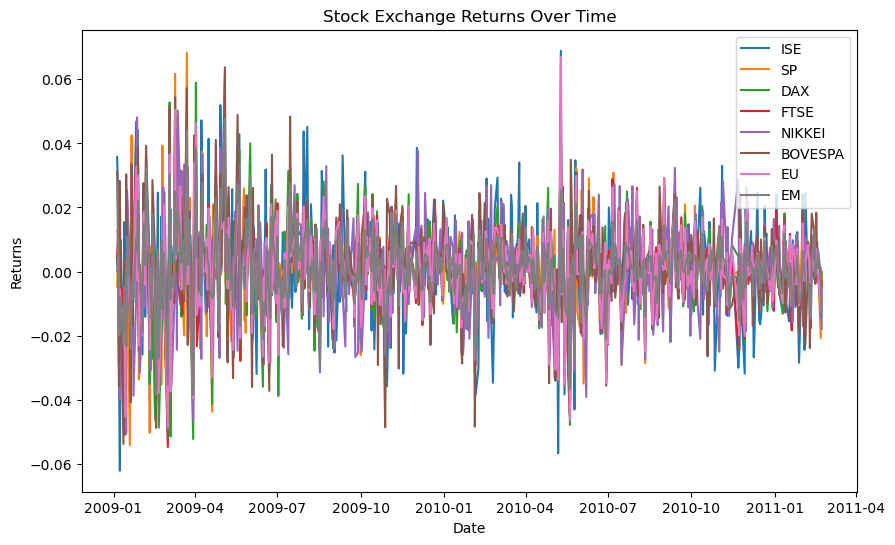

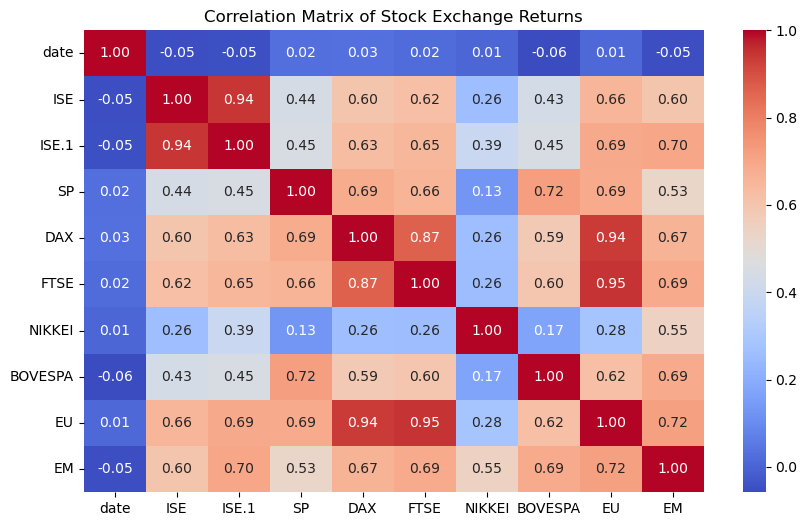

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos con el formato de fecha especificado
data_url = 'https://archive.ics.uci.edu/static/public/247/data.csv'
df = pd.read_csv(data_url, parse_dates=['date'], dayfirst=True)

# Convertir la columna de fecha al tipo de dato de fecha
df['date'] = pd.to_datetime(df['date'])

# Exploración inicial de los datos
print(df.head())
print("Información sobre el conjunto de datos:")
display(df.info(memory_usage='deep', show_counts=True))

# Estadísticas descriptivas
print(df.describe())

# Visualización de datos
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['ISE'], label='ISE')
plt.plot(df['date'], df['SP'], label='SP')
plt.plot(df['date'], df['DAX'], label='DAX')
plt.plot(df['date'], df['FTSE'], label='FTSE')
plt.plot(df['date'], df['NIKKEI'], label='NIKKEI')
plt.plot(df['date'], df['BOVESPA'], label='BOVESPA')
plt.plot(df['date'], df['EU'], label='EU')
plt.plot(df['date'], df['EM'], label='EM')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('Stock Exchange Returns Over Time')
plt.legend()
plt.show()

# Análisis de correlación
correlation_matrix = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Stock Exchange Returns')
plt.show()



Formato de la columna de fecha:
0   2009-01-05
1   2009-01-06
2   2009-01-07
3   2009-01-08
4   2009-01-09
Name: date, dtype: datetime64[ns]
Frecuencia de los datos:
date
1 days    420
3 days    102
2 days      4
4 days      4
5 days      3
6 days      1
7 days      1
Name: count, dtype: int64


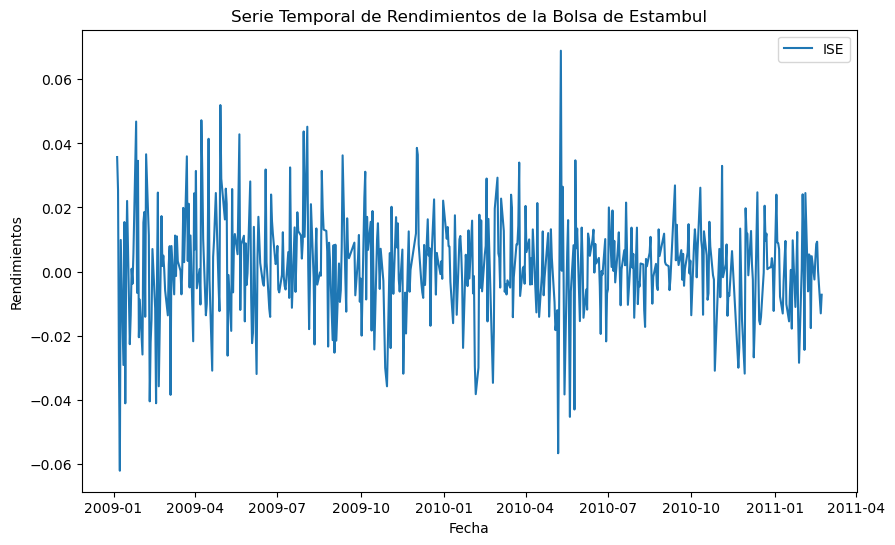

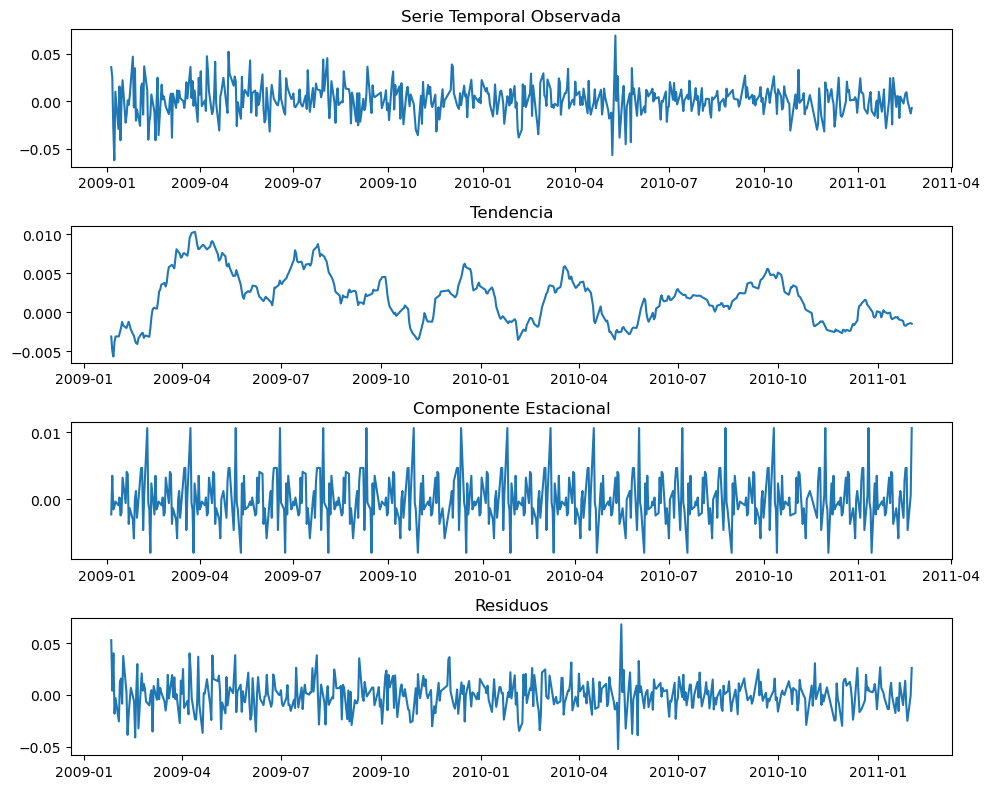

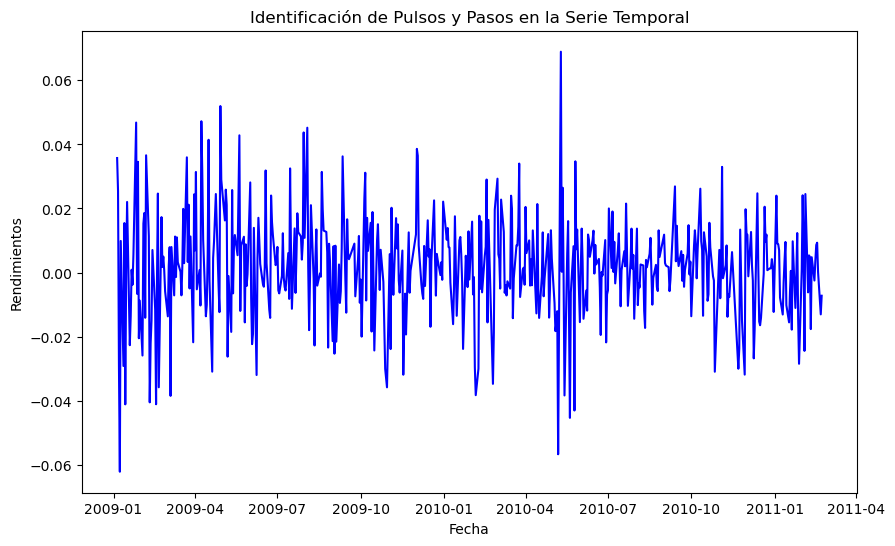

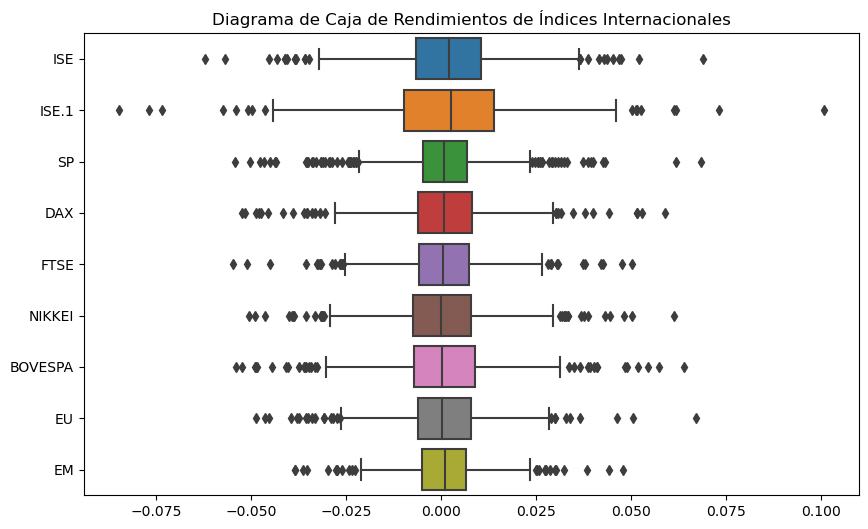

In [ ]:
import ruptures as rpt
import statsmodels.api as sm
import statsmodels.api as sm


# 1. Formato y Frecuencia
print("Formato de la columna de fecha:")
print(df['date'].head())
print("Frecuencia de los datos:")
print(df['date'].diff().value_counts())

# 2. Visualización de Tendencias
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['ISE'], label='ISE')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.title('Serie Temporal de Rendimientos de la Bolsa de Estambul')
plt.legend()
plt.show()

# 3. Análisis de Ciclos Estacionales y No Estacionales

# Descomposición de la serie temporal
result = sm.tsa.seasonal_decompose(df['ISE'], model='additive', period=30)

# Visualización de los componentes de la descomposición
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(df['date'], result.observed)
plt.title('Serie Temporal Observada')

plt.subplot(4, 1, 2)
plt.plot(df['date'], result.trend)
plt.title('Tendencia')

plt.subplot(4, 1, 3)
plt.plot(df['date'], result.seasonal)
plt.title('Componente Estacional')

plt.subplot(4, 1, 4)
plt.plot(df['date'], result.resid)
plt.title('Residuos')

plt.tight_layout()
plt.show()

# 4. Identificación de Pulsos y Pasos



# Algoritmo para detectar cambios estructurales (pulsos y pasos)
algo = rpt.Pelt(model='rbf').fit(df['ISE'].values)
result = algo.predict(pen=10)

# Visualización de los cambios estructurales
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['ISE'], color='blue')
for c in result:
    plt.plot(df['date'][c:], df['ISE'][c:], color='red')
plt.title('Identificación de Pulsos y Pasos en la Serie Temporal')
plt.xlabel('Fecha')
plt.ylabel('Rendimientos')
plt.show()
# 5. Detección de Valores Atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, 1:], orient='h')
plt.title('Diagrama de Caja de Rendimientos de Índices Internacionales')
plt.show()